In [2]:
%config InlineBackend.figure_format = 'retina'

!apt-get -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=font_path, size=9)

In [3]:
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kor_tour.xlsx to kor_tour (1).xlsx
User uploaded file "kor_tour.xlsx" with length 15068 bytes


In [5]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#-----------------------------------------------------------------------------
f = open('2007-00328-이형걸-1.txt','w')  # 수험번호와 이름 입력(출력파일 이름)
stdout = sys.stdout
sys.stdout = f

print()
print("*"*20, "파이썬프로그래밍활용 1급 실기과제-1", "*"*20)
print()
print("---수험번호 :   2007-00328      이름 :  이형걸      ") # 수험번호와 이름 입력 
print()
print("*"*80)
#-----------------------------------------------------------------------------

# 1. 엑셀 파일 읽기
df = pd.read_excel('kor_tour.xlsx', sheet_name = 'kto_201908')
print("1. 엑셀 파일 읽기")
print(df.head(3))
print("*"*80)

print()


In [6]:
# 2. "국적" 컬럼이 대륙 이름인 컬럼을 제거하고 국가만 남기기
ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주']

# 2-1. "국적" 컬럼이 대륙 이름(ignore_list)인 로우 검색하기
df.loc[df['국적'].isin(ignore_list)]

# 2-2. "국적" 컬럼이 대륙 이름인 컬럼을 제거하고 df에 저장하기
df = df.loc[~df['국적'].isin(ignore_list), :] 
print("2. 대륙이름 제거한 데이타 프레임 출력")
print(df.head(3))
print("*"*80)
print()

In [7]:
# 3. 관광객 수가 가장 많은 국가에서 적은 수 5개의 국적을 출력
df_sort = df.sort_values(by=['관광'], axis=0, ascending=False)
print("3. 관광객수가 가장 많은 국가 Top 3")
print(df_sort.head(3))
print("*"*80)
print()

In [8]:
# 4. 국적별 '관광객비율' 컬럼 추가 
df['관광객비율'] = round((df['관광'] / df['계']) * 100,1)
print("4. 관광객비율 컬럼 추가한 데이타프레임 출력")
print(df.head(3))
print("*"*80)
print()

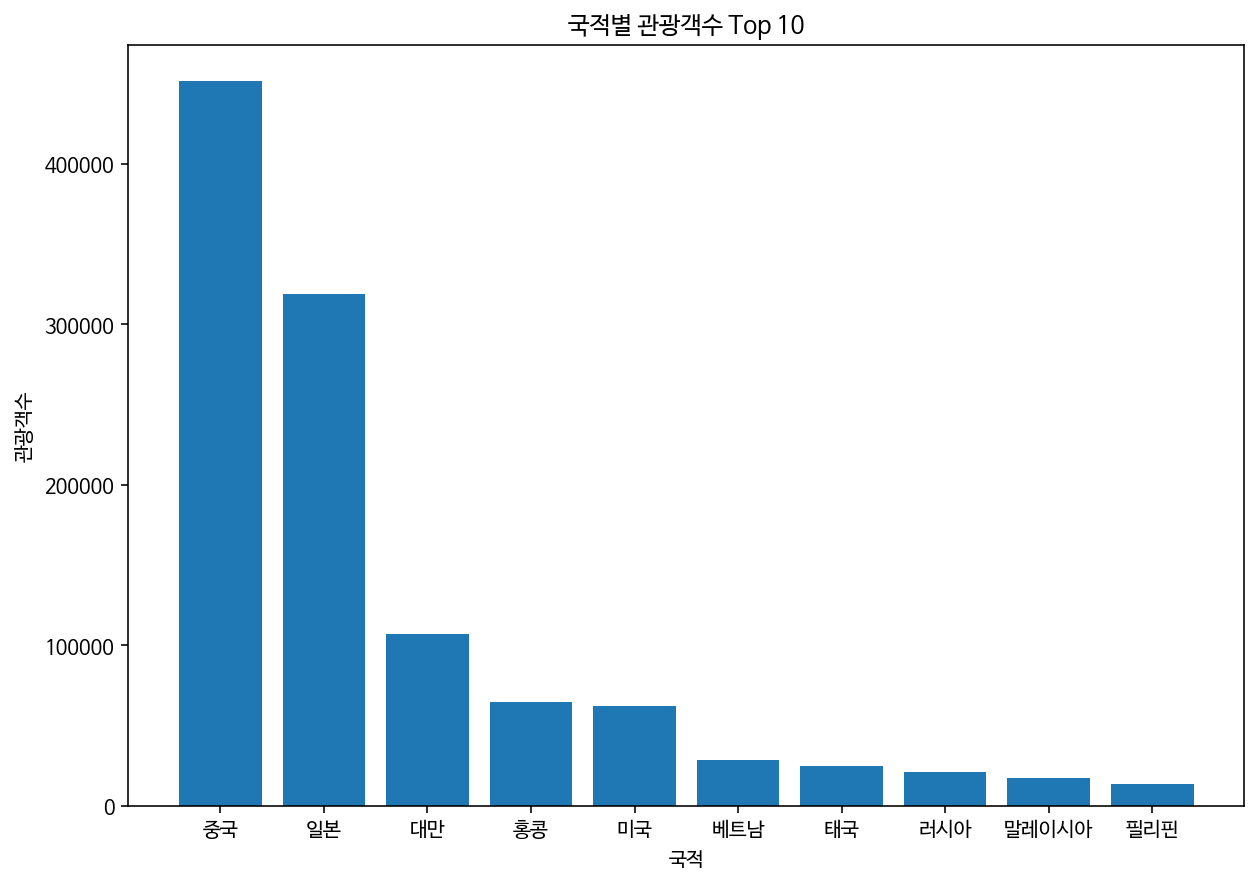

In [9]:
# 5. 국적별 관광객 수 그래프 그리기
# 5-1. 관광객 수가 가장 많은 국가에서 적은 수 순으로 5개를 df_top으로 저장
df_top = df.sort_values(by=['관광'], axis=0, ascending=False)

# 5-2. 국적별 관광객수 그래프 
plt.figure(figsize=(10,7))
plt.title('국적별 관광객수 Top 10')
plt.xlabel('국적')
plt.ylabel('관광객수')
x = df_top['국적']
y = df_top['관광']
plt.bar(x.head(10),y.head(10))
plt.grid()
plt.savefig("2007-00328-이형걸-2.png") # 수험번호와 이름 입력.


print("*"*27, "실기 과제 종료", "*"*27)
f.close()    
sys.stdout = stdout
